# Assignment 7
- Joel Oliveira - fc59442
- João Braz - fc60419

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, activations


## Setup Models

In [2]:
def create_lstm(hidden_layer_size, lag, act):
    lstm = models.Sequential([
        layers.InputLayer(input_shape=(lag, 1)),
        layers.LSTM(HIDDEN_LAYER_SIZE),
        layers.Dense(1, activation=act)
    ])
    return lstm

In [3]:
def create_ffnn(hidden_layer_size, lag, act):
    model = models.Sequential([
        layers.InputLayer(input_shape=(lag,1)),
        layers.Dense(hidden_layer_size, activation="relu"),
        layers.Dense(1, act)
    ])
    return model

## Problem 1

### Generate data

In [4]:
periods=100
samples_per_period=50
x = np.linspace(0, 2*np.pi*periods, samples_per_period*periods)
noise = np.random.normal(0, 0.05, size=samples_per_period*periods)

In [5]:
data = np.sin(x)
data_with_noise = data+noise

In [6]:
def get_lagged_data(data, lag):
    return np.vstack(
        [data[i:i+lag] for i in range(data.shape[0]-lag)]
    )

In [7]:
lag=12
X = get_lagged_data(data, lag)
X_noise = get_lagged_data(data_with_noise, lag)
y = np.roll(data, -lag)[:-lag]

In [8]:
X.shape, y.shape

((4988, 12), (4988,))

In [9]:
X_train_a, y_train_a = X[:2400], y[:2400]
X_test_a, y_test_a = X[2400:2500], y[2400:2500]

X_train_b, y_train_b = X[2400:4900], y[2400:4900]
X_test_b, y_test_b = X[4900:], y[4900:]

In [10]:
Xn_train_a = X_noise[:2400]
Xn_test_a = X_noise[2400:2500]

Xn_train_b = X_noise[2400:4900]
Xn_test_b = X_noise[4900:]

In [11]:
HIDDEN_LAYER_SIZE=12

### *i )* Clean data

#### LSTM model

In [12]:
lstm = create_lstm(HIDDEN_LAYER_SIZE, lag, "tanh")

In [13]:
lstm.compile("adam", "mse")

In [14]:
lstm.fit(
    X_train_a, 
    y_train_a, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(X_test_a, y_test_a)
)

2400/2400 [==============================] - 18s 6ms/step - loss: 0.0520 - val_loss: 0.0025


In [15]:
lstm.fit(
    X_train_b, 
    y_train_b, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(X_test_b, y_test_b)
)

2500/2500 [==============================] - 16s 6ms/step - loss: 0.0042 - val_loss: 0.0011


In the first training we can clearly see the *burn-in* effect. After the training is done, the validation loss is actually 10 times smaller. <br>
In the second training this event is not so clear. Because the data is "perfect", without any noise, it slowly converges to 0 error, as there are no irregularities.

#### Time-Lagged Feedforward Network

In [20]:
HIDDEN_LAYER_SIZE = 20
model = create_ffnn(HIDDEN_LAYER_SIZE, lag, "tanh")

In [21]:
model.compile("adam", "mse")

In [22]:
model.fit(
    X_train_a, 
    y_train_a, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(X_test_a, y_test_a)
)

2400/2400 [==============================] - 9s 4ms/step - loss: 0.3290 - val_loss: 0.3076


In [23]:
model.fit(
    X_train_b, 
    y_train_b, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(X_test_b, y_test_b)
)

2500/2500 [==============================] - 10s 4ms/step - loss: 0.3230 - val_loss: 0.2813


We can see that the *LSTM* model converged much faster than the feedforward network, and to a much lower loss value. After just one epoch the loss was almost 0. The second epoch didn't improve the model. <br>

In contrast to the *LSTM* we can see a large *burn-in* effect in the second training process.

[comment]: <> (On the other hand, the *time-lagged feedforward network* improved slowly in each epoch but we can see it keeps improving in the second epoch.)

### *ii )* Noise Data

#### LSTM model

In [16]:
lstm = create_lstm(HIDDEN_LAYER_SIZE, lag, "tanh")

In [17]:
lstm.compile("adam", "mse")

In [18]:
lstm.fit(
    Xn_train_a, 
    y_train_a, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(Xn_test_a, y_test_a)
)

2400/2400 [==============================] - 17s 7ms/step - loss: 0.0257 - val_loss: 0.0057


In [19]:
lstm.fit(
    Xn_train_b, 
    y_train_b, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(Xn_test_b, y_test_b)
)

2500/2500 [==============================] - 16s 6ms/step - loss: 0.0046 - val_loss: 0.0056


Similarly to the scenario without any noise, in the first training process there is a clear *burn-in* effect. The loss value also reduces by a factor of 10 from training to validation set. However, in the second training process, after the *burn-in* effect has already happened, the model stops converging, due to the *irreducible error*.

#### Time-lagged Feedforward network

In [24]:
HIDDEN_LAYER_SIZE = 20
model = create_ffnn(HIDDEN_LAYER_SIZE, lag, "tanh")

In [26]:
model.compile("adam", "mse")

In [27]:
model.fit(
    Xn_train_a, 
    y_train_a, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(Xn_test_a, y_test_a)
)

2400/2400 [==============================] - 9s 4ms/step - loss: 0.3538 - val_loss: 0.3163


In [28]:
model.fit(
    Xn_train_b, 
    y_train_b, 
    shuffle=False, 
    batch_size=1, 
    epochs=1, 
    validation_data=(Xn_test_b, y_test_b)
)

2500/2500 [==============================] - 9s 4ms/step - loss: 0.3228 - val_loss: 0.2790


Since the *feedforward network* did not converge as much as the *LSTM* model the results are similar to the scenario were there is no noise. The irreducible error only manifests when the model converges to 0.

## Problem 2

### Generate Data

In [29]:
def generate_data(
    N:int, 
    starting_points:list,
):
    α_1, α_2, α_3 = .6, -.54, -.44
    noise = np.random.normal(0, 0.01, N-len(starting_points))
    
    data = starting_points.copy()
    for i in range(N - len(starting_points)):
        data.append(
            (α_1 * data[-1]) + (α_2 * data[-2]) + (α_3 * data[-3]) + noise[i]
        )
    return np.array(data)

In [30]:
data = generate_data(5000, [5, 6, 3])

In [31]:
lag=12
X = get_lagged_data(data, lag)
y = np.roll(data, -lag)[:-lag]

In [32]:
X.shape, y.shape

((4988, 12), (4988,))

In [33]:
X_train_a, y_train_a = X[:2400], y[:2400]
X_test_a, y_test_a = X[2400:2500], y[2400:2500]

X_train_b, y_train_b = X[2400:4900], y[2400:4900]
X_test_b, y_test_b = X[4900:], y[4900:]

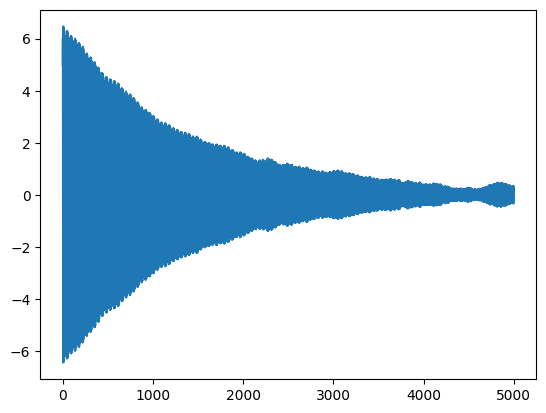

In [34]:
plt.plot(data);

### LSTM

In [35]:
HIDDEN_LAYER_SIZE=12

In [47]:
lstm = create_lstm(HIDDEN_LAYER_SIZE, lag, "linear")
lstm.compile("adam", "mse")

In [48]:
lstm.fit(
    X_train_a,
    y_train_a,
    batch_size=1,
    shuffle=False,
    epochs=1,
    validation_data=(X_test_a, y_test_a)
)

2400/2400 [==============================] - 17s 6ms/step - loss: 2.5973 - val_loss: 3.7245e-04


In [49]:
lstm.fit(
    X_train_b,
    y_train_b,
    batch_size=1,
    shuffle=False,
    epochs=1,
    validation_data=(X_test_b, y_test_b)
)

2500/2500 [==============================] - 15s 6ms/step - loss: 3.9259e-04 - val_loss: 9.1912e-04


We can see by the previous plot that the values of the time-series range from around [-6, 6]. Due to this, orignally using the *tanh* activation function the model was never converging, since it couldn't reproduce the outputs. Hyperbolic tangent ranges from [-1,1].

After changing the activation function to linear, we can see that the LSTM has a huge *burn-in* effect, just like in the sine series. <br>
The second training process also improves the loss from training to validation set, but, like before it is never 0, as the noise introduced creates the irreducible error.

## Time-lagged Feedforward Network

In [50]:
model = create_ffnn(HIDDEN_LAYER_SIZE, lag, "linear")
model.compile("adam", "mse")

In [51]:
model.fit(
    X_train_a,
    y_train_a,
    batch_size=1,
    shuffle=False,
    epochs=1,
    validation_data=(X_test_a, y_test_a)
)

2400/2400 [==============================] - 10s 4ms/step - loss: 5.8829 - val_loss: 0.6707


In [52]:
model.fit(
    X_train_b,
    y_train_b,
    batch_size=1,
    shuffle=False,
    epochs=1,
    validation_data=(X_test_b, y_test_b)
)

2500/2500 [==============================] - 9s 4ms/step - loss: 0.2277 - val_loss: 0.0637


The feed forward network, like before, has a much slower convergence speed, compared to the LSTM. This is because the LSTM architecture is optimized to 'remember' long term information that aids to the predictive task.